In [4]:
!pip install pandas 
!pip install seaborn
!pip install torch
!pip install tqdm


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Diae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Diae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/216.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/216.1 MB 960.0 kB/s eta 0:03:46
   ---------------------------------------- 0.2/216.1 MB 2.9 MB/s eta 0:01:15
   ---------------------------------------- 0.3/216.1 MB 2.3 MB/s eta 0:01:33
   ---------------------------------------- 0.4/216.1 MB 2.1 MB/s eta 0:01:44
   ---------------------------------------- 0.6/216.1 MB 2.8 MB/s eta 0:01:17
   ---------------------------------------- 0.8/216.1 MB 2.8 MB/s eta 0:01:17
   ---------------------------------------- 0.9/216.1 MB 2.8 MB/s eta 0:01:17
   ---------------------------------------- 1.0/216.1 MB 2.8 MB/s eta 0:01:18
   ---------------------------------------- 1.1/216.1 MB 2.8 MB/s eta 0:01:18
   ----------------------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Diae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Diae\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


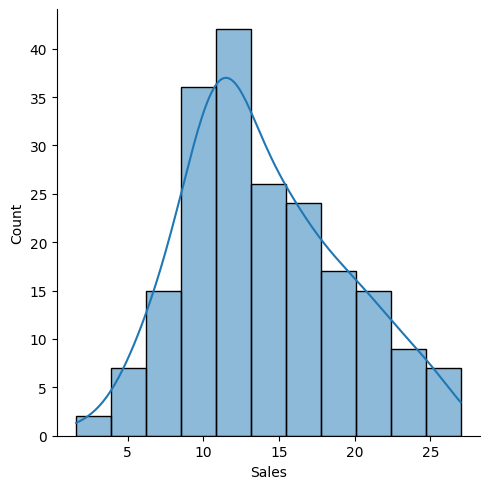

In [25]:
import pandas as pd
data = pd.read_csv("Advertising.csv")
data.head()
data.shape[0]
import seaborn as sns
data_sales = pd.DataFrame(data['Sales'])
sns.displot(data_sales, x="Sales",kde=True)



In [26]:
import torch
import torch.nn as nn
from tqdm import tqdm #progress Bar
tv = torch.tensor( data = data.TV.values, dtype = torch.float ) # x_1
radio = torch.tensor( data = data.Radio.values, dtype = torch.float) # x_2
news = torch.tensor( data = data.Newspaper.values, dtype = torch.float) # x_3
sales = torch.tensor( data = data.Sales.values, dtype = torch.float ) # targets

a = torch.randn(1, requires_grad = True) # start with a random number from a

b = torch.randn(1, requires_grad = True)
c = torch.randn(1, requires_grad = True)
d = torch.randn(1, requires_grad = True)


In [27]:
tv.shape

torch.Size([200])

In [28]:
def mylnmodel( tv:torch.Tensor, radio:torch.Tensor, news:torch.Tensor):
    """
    computes f(x; theta0,theta1,theta2,theta3) = theta0 + theta1 x_1 + theta2 x_2 +
    theta3 x_3,
    for independent variables x_1, x_2 and x_3.
    Arguments:
    tv (tensor) with the values of tv investment (x_1)
    radio (tensor) with the values of radio investment (x_2)
    news (tensor) with the newspaper investment (x_3).
    Note: coefficients theta0, theta1, theta2 and theta3 must be previoulsy
    defined as tensors with requires_grad = True
    Returns a tensor with the backward() method
    """
    return a + b*tv + c*radio + d*news

In [29]:
predicted = mylnmodel(tv, radio, news)
predicted.shape


torch.Size([200])

Text(60, 20, 'news  = -0.4730')

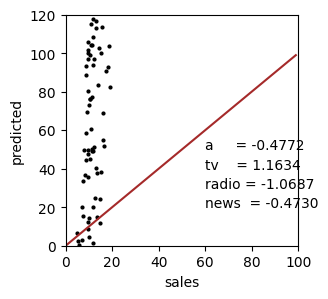

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.scatter(sales, predicted.detach(), c='k', s=4)
plt.xlabel('sales'), plt.ylabel('predicted')
x = y = range(100)
plt.plot(x,y, c='brown')
plt.xlim(0,100), plt.ylim(0,120)
plt.text(60,50, f'a     = {a.item():2.4f}', fontsize=10)
plt.text(60,40, f'tv    = {b.item():2.4f}', fontsize=10)
plt.text(60,30, f'radio = {c.item():2.4f}', fontsize=10)
plt.text(60,20, f'news  = {d.item():2.4f}', fontsize=10)

In [33]:
def MSE(y_predicted:torch.Tensor, y_target:torch.Tensor):
    """
    Returns a single value tensor with
    the mean of squared errors (SSE) between the predicted and target
    values:
    """
    error = y_predicted - y_target # element-wise substraction
    return torch.sum(error**2 ) / error.numel() # mean (sum/n)

In [34]:
predicted = mylnmodel(tv,radio,news)
loss = MSE(y_predicted = predicted, y_target=sales)
print(loss)


tensor(23190.9375, grad_fn=<DivBackward0>)


In [37]:
print(f'a = {float(a.item()):+2.4f}, df(a)/da = {a.grad}') # 0.3367
print(f'b = {float(b.item()):+2.4f}, df(b)/da = {a.grad}') # 0.1288
print(f'c = {float(c.item()):+2.4f}, df(c)/dc = {c.grad}') # 0.2345
print(f'd = {float(d.item()):+2.4f}, df(d)/dd = {d.grad}') # 0.2303

a = -0.4772, df(a)/da = None
b = +1.1634, df(b)/da = None
c = -1.0687, df(c)/dc = None
d = -0.4730, df(d)/dd = None


In [38]:
loss.backward()

In [39]:
print(f'a = {float(a.item()):+2.4f}, df(a)/da = {a.grad}') # 0.3367
print(f'b = {float(b.item()):+2.4f}, df(b)/da = {a.grad}') # 0.1288
print(f'c = {float(c.item()):+2.4f}, df(c)/dc = {c.grad}') # 0.2345
print(f'd = {float(d.item()):+2.4f}, df(d)/dd = {d.grad}') # 0.2303

a = -0.4772, df(a)/da = tensor([234.4982])
b = +1.1634, df(b)/da = tensor([234.4982])
c = -1.0687, df(c)/dc = tensor([4951.7324])
d = -0.4730, df(d)/dd = tensor([6668.4937])


100%|██████████| 5000/5000 [00:02<00:00, 2187.33it/s]


(Text(0.5, 0, 'Epoch (#)'), Text(0, 0.5, 'Mean squared Errors'))

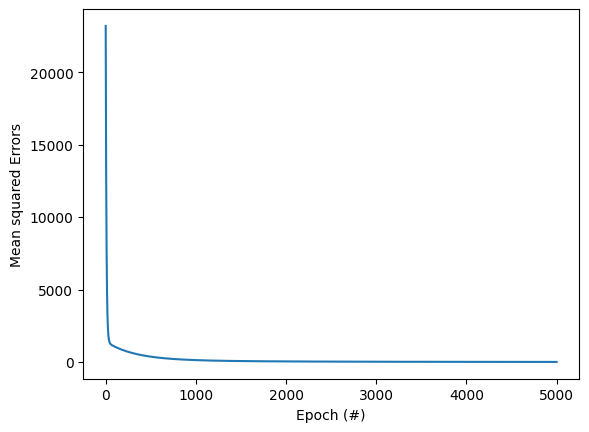

In [40]:
## Use gradiendt descent
myMSE = list()
for i in tqdm(range(5_000)):
    a.grad.zero_()
    b.grad.zero_()
    c.grad.zero_()
    d.grad.zero_()
    
    predicted = mylnmodel(tv,radio,news) # forward pass (compute results)
    loss = MSE(y_predicted = predicted, y_target = sales) # calculate MSE
    
    loss.backward() # compute gradients
    myMSE.append(loss.item()) # append loss
    with torch.no_grad():
        a -= a.grad * 1e-6
        b -= b.grad * 1e-6
        c -= c.grad * 1e-6
        d -= d.grad * 1e-6
        
plt.plot(myMSE)
plt.xlabel('Epoch (#)'), plt.ylabel('Mean squared Errors')

Text(25, 6, 'news  = 0.0869')

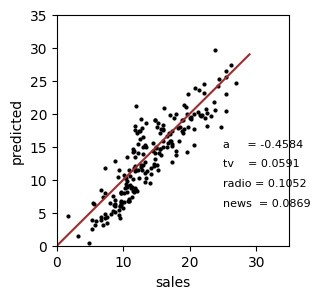

In [41]:
plt.figure(figsize=(3,3))
plt.scatter(sales, predicted.detach(), c='k', s=4)
plt.xlabel('sales'), plt.ylabel('predicted')
x = y = range(30)
plt.plot(x,y, c='brown')
plt.xlim(0,35), plt.ylim(0,35)
plt.text(25, 15, f'a     = {a.item():2.4f}', fontsize=8)
plt.text(25, 12, f'tv    = {b.item():2.4f}', fontsize=8)
plt.text(25, 9,  f'radio = {c.item():2.4f}', fontsize=8)
plt.text(25, 6,  f'news  = {d.item():2.4f}', fontsize=8)